In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#Importing data
data = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# EDA and Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
data1 = pd.concat([data.iloc[:,2:4],data.iloc[:,6:7],data.iloc[:,8:9],data.iloc[:,12:14],data.iloc[:,15:18]],axis=1)
data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
data2 = data1.rename({'Age_08_04':'Age', 'cc':'CC', 'Quarterly_Tax':'QT'},axis = 1)
data2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
data2[data2.duplicated()].shape

(1, 9)

In [7]:
data2[data2.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [8]:
data3 = data2.drop_duplicates().reset_index(drop=True)
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [9]:
data3.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [10]:
data3.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


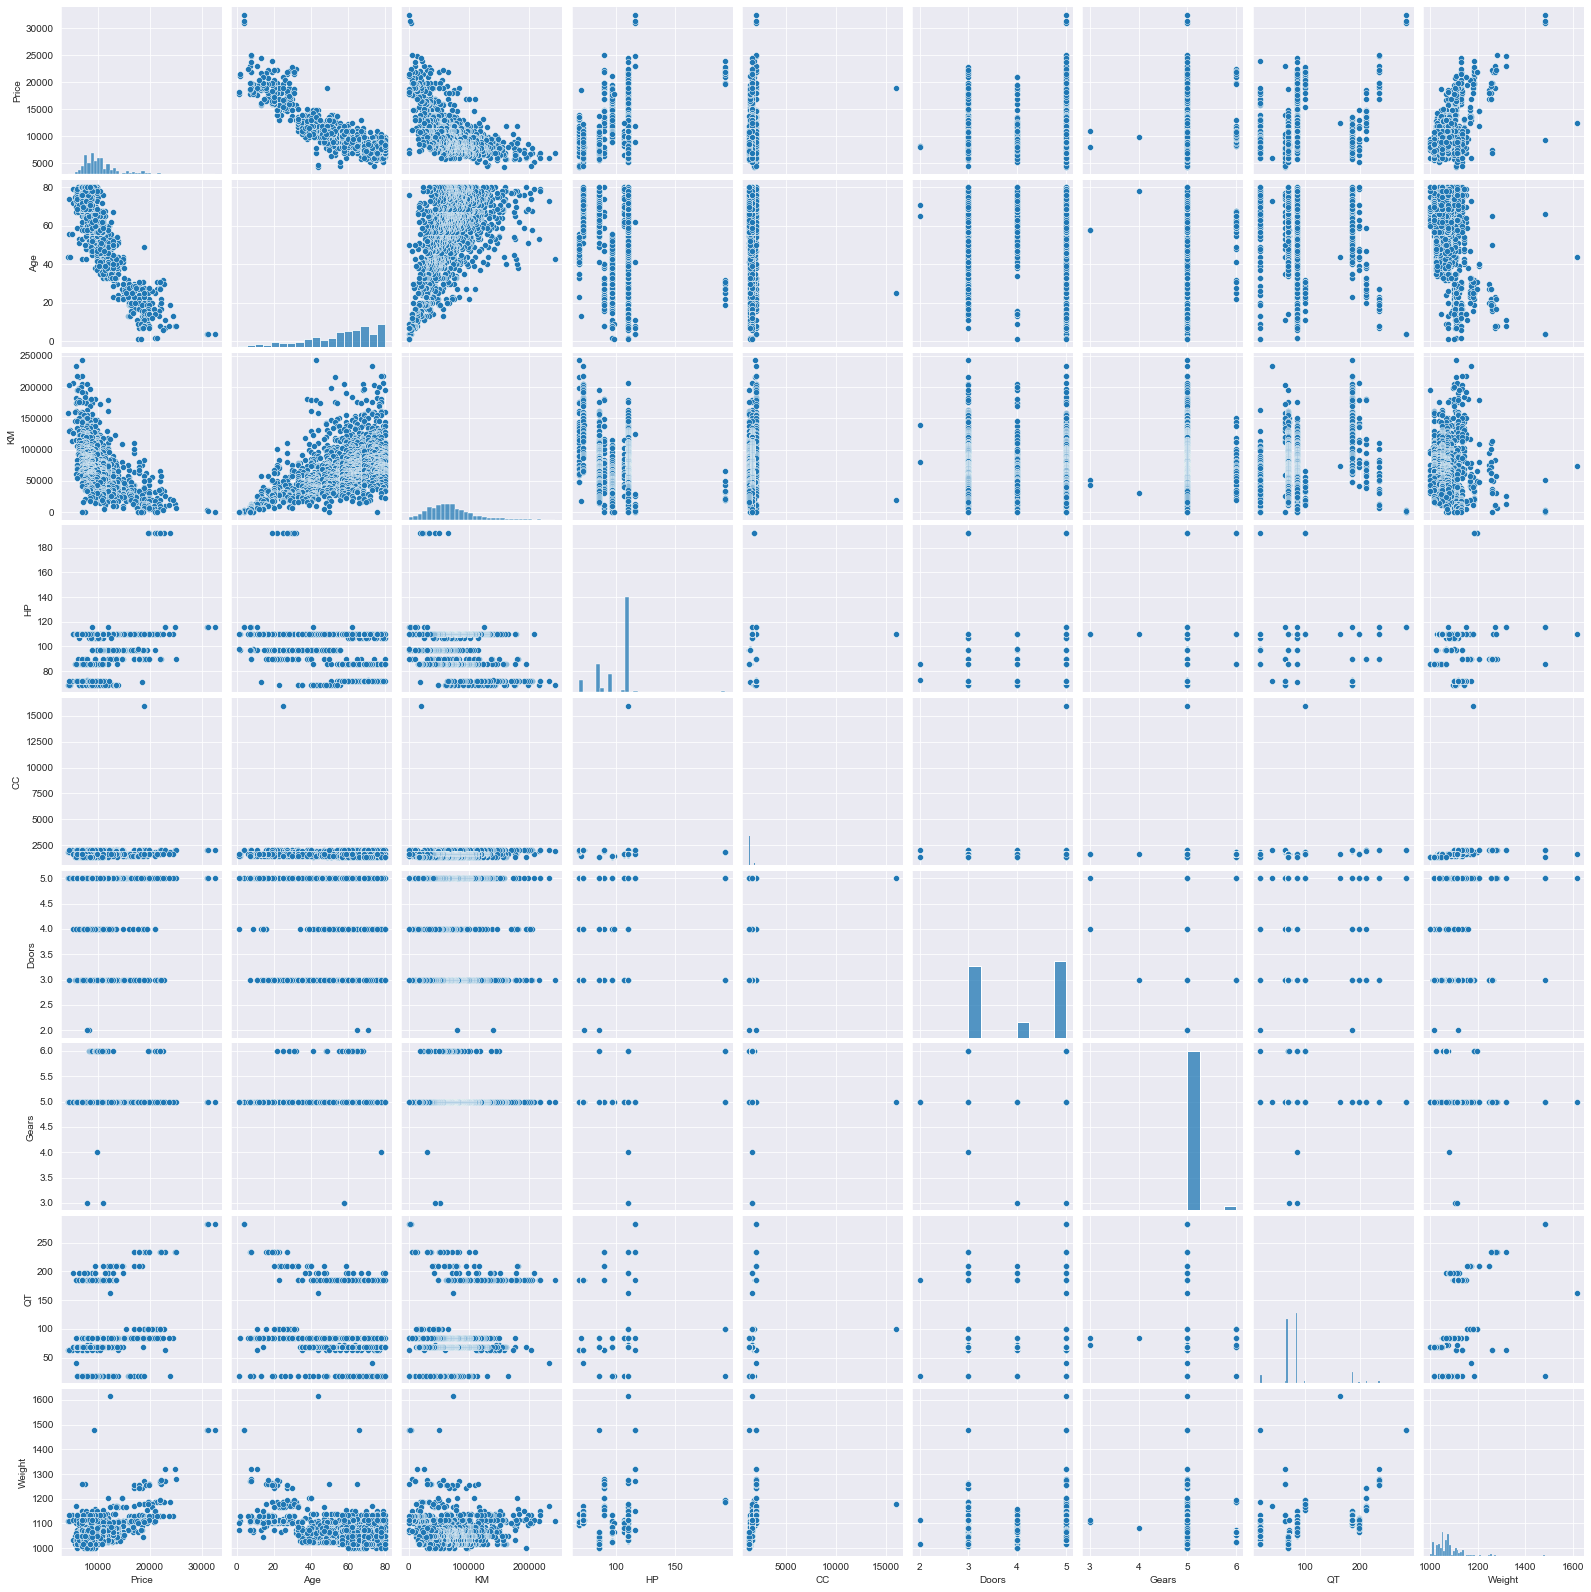

In [11]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data3)

# Model Building

In [12]:
model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = data3).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Mon, 25 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:41:06   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Testing

In [13]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [14]:
model.tvalues, model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 HP            5.211155e-28
 CC            1.882393e-01
 Doors         9.816443e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Weight        1.031118e-51
 dtype: float64)

In [15]:
model.rsquared, model.rsquared_adj

(0.8625200256947, 0.8617487495415146)

In [16]:
#build model with CC using SLR
cc_model = smf.ols('Price~CC', data = data3).fit()

In [17]:
cc_model.tvalues, cc_model.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [18]:
#build model with Doors using SLR
doors_model = smf.ols('Price~Doors', data = data3).fit()

In [19]:
doors_model.tvalues, doors_model.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [20]:
#build model with CC and Doors using MLR
mlr_model = smf.ols('Price~CC+Doors', data = data3).fit()

In [21]:
mlr_model.tvalues, mlr_model.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

# Model Validation

## 1. Collinearity Check

In [22]:
#Calculate VIF = 1/(1-Rsquared) for all independent variables

rsq_age = smf.ols('Age~KM+HP+CC+Doors+Gears+QT+Weight', data = data3).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_km = smf.ols('KM~Age+HP+CC+Doors+Gears+QT+Weight', data = data3).fit().rsquared
vif_km = 1/(1-rsq_km)

rsq_hp = smf.ols('HP~KM+Age+CC+Doors+Gears+QT+Weight', data = data3).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_cc = smf.ols('CC~KM+HP+Age+Doors+Gears+QT+Weight', data = data3).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~KM+HP+CC+Age+Gears+QT+Weight', data = data3).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~KM+HP+CC+Doors+Age+QT+Weight', data = data3).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qt = smf.ols('QT~KM+HP+CC+Doors+Gears+Age+Weight', data = data3).fit().rsquared
vif_qt = 1/(1-rsq_qt)

rsq_wt = smf.ols('Weight~KM+HP+CC+Doors+Gears+QT+Age', data = data3).fit().rsquared
vif_wt = 1/(1-rsq_wt)

#Putting values in DataFrame format
d1 = {'Variables': ['Age', 'KM', 'HP', 'CC', 'Doors', 'Gears', 'QT', 'Weight'], 
     'VIF': [vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_qt, vif_wt]}
Vif_df = pd.DataFrame(d1)
Vif_df

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


No Collinearity, so consider all variables in regression equation

## 2. Residual Analysis

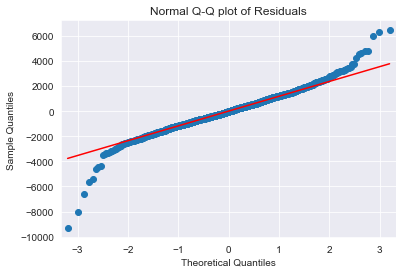

In [23]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

In [24]:
list(np.where(model.resid > 6000))

[array([109, 146, 522], dtype=int64)]

In [25]:
list(np.where(model.resid < -6000))

[array([220, 600, 959], dtype=int64)]

### Test for Homoscedasticity or Heteroscedasticity

In [26]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

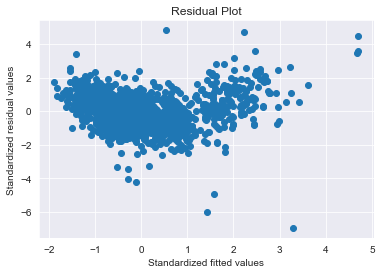

In [27]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Test for errors or Residuals vs Regressors or independent 'x' variables or predictors

eval_env: 1


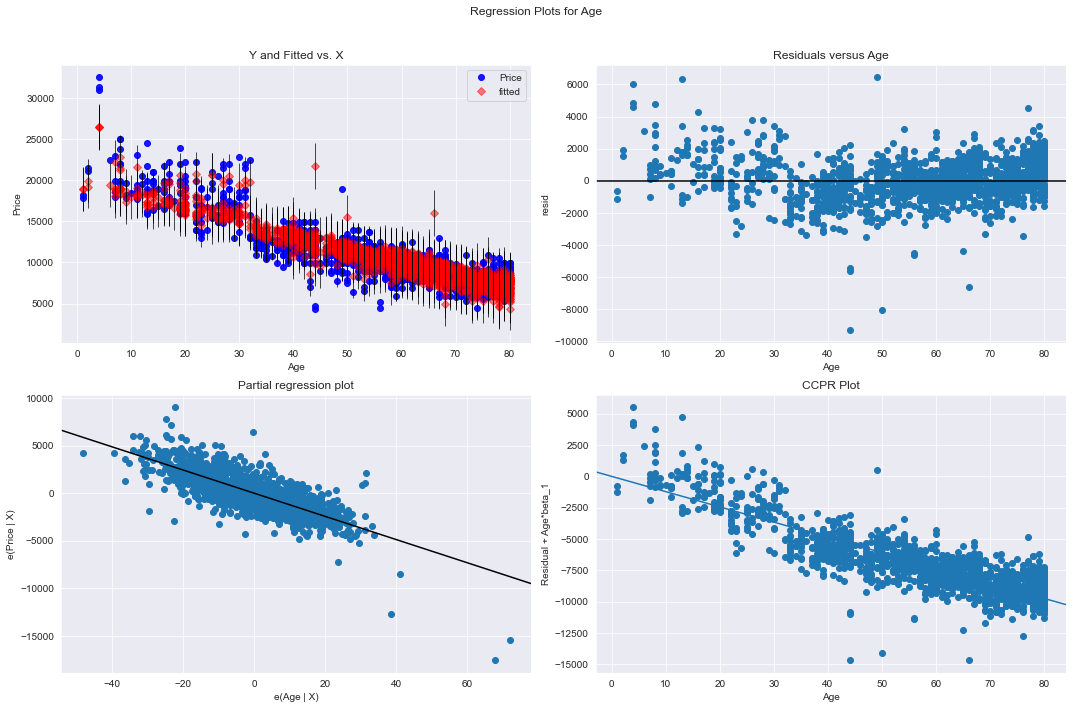

In [28]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'Age', fig = fig)
plt.show()

eval_env: 1


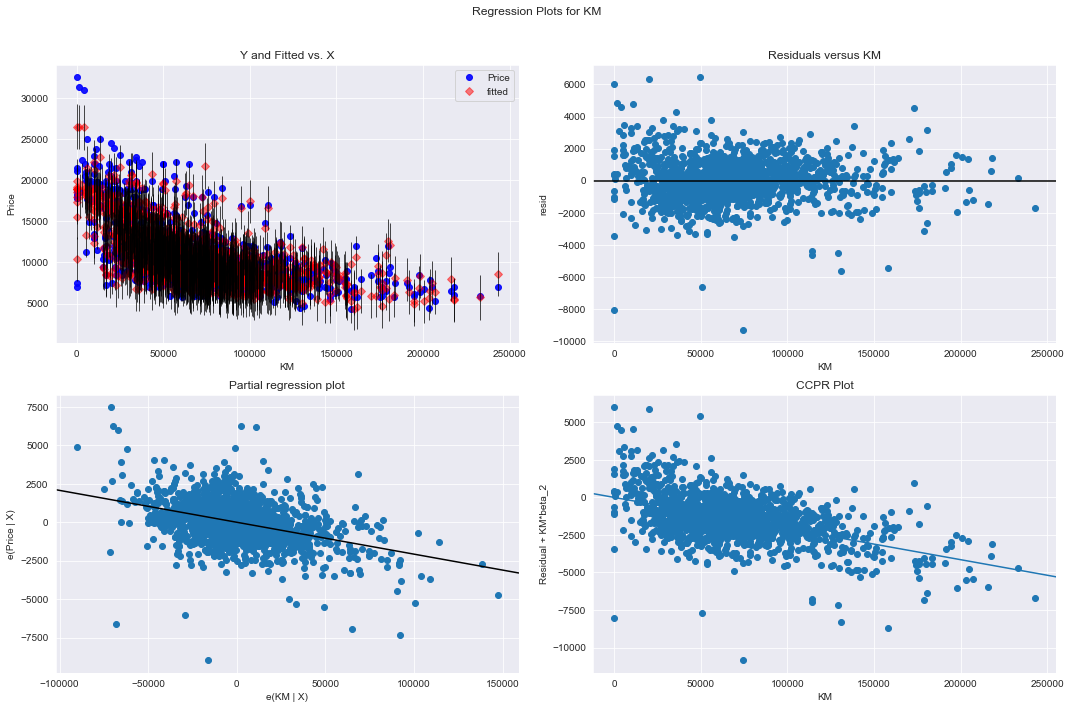

In [29]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'KM', fig = fig)
plt.show()

eval_env: 1


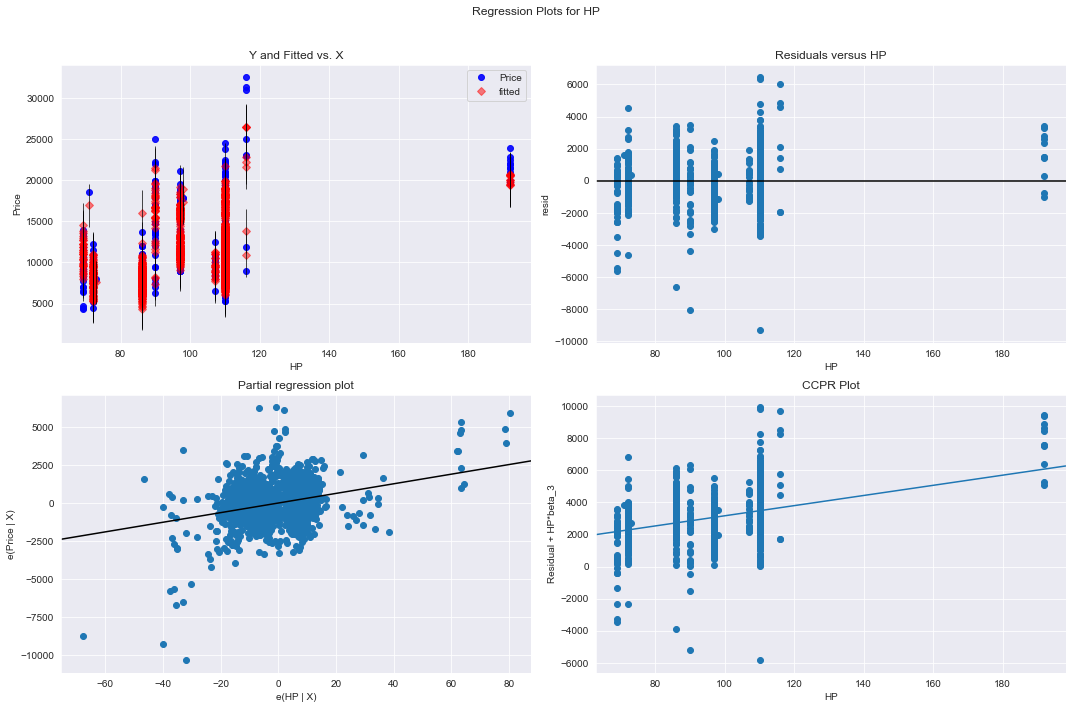

In [30]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'HP', fig = fig)
plt.show()

eval_env: 1


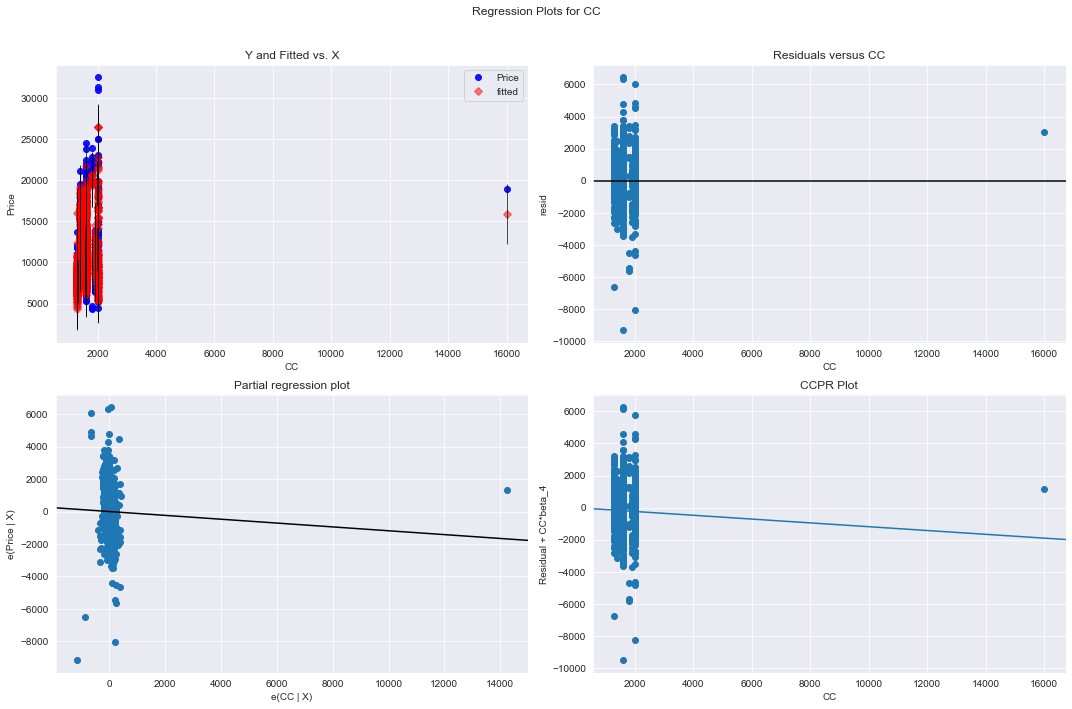

In [31]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'CC', fig = fig)
plt.show()

eval_env: 1


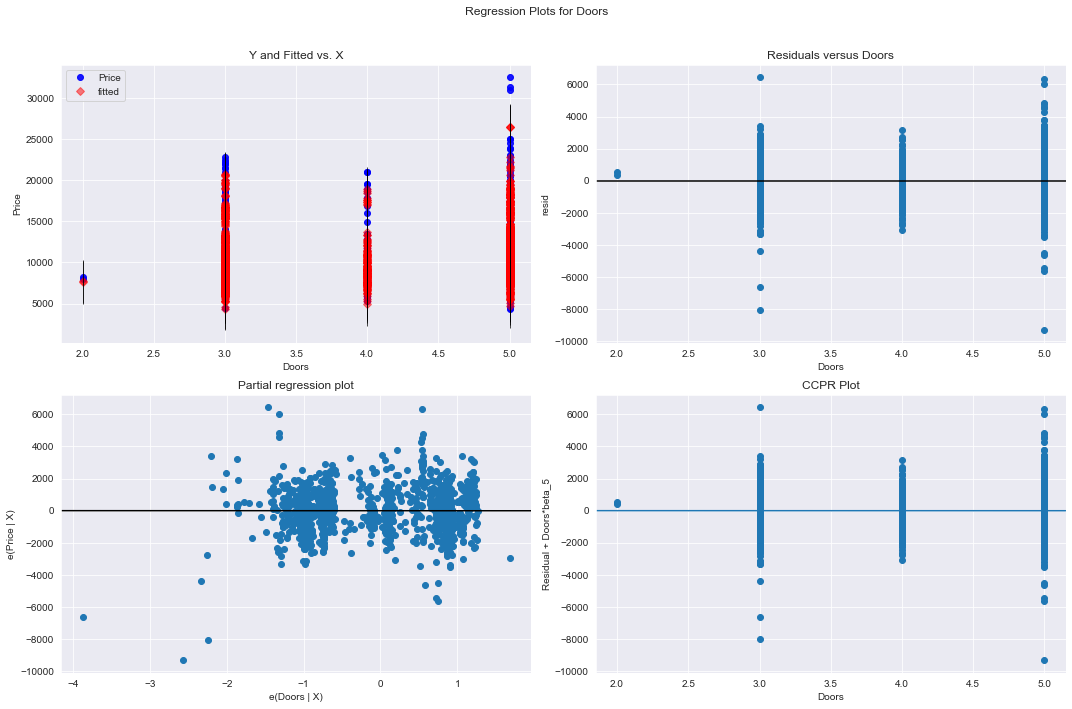

In [32]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'Doors', fig = fig)
plt.show()

eval_env: 1


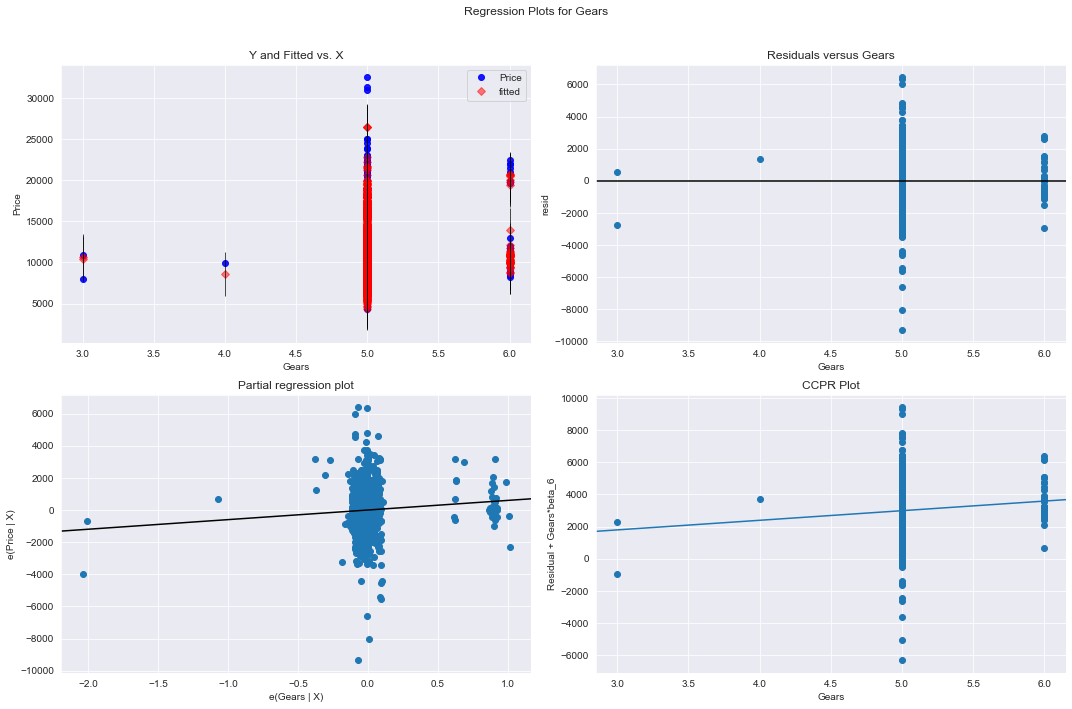

In [33]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'Gears', fig = fig)
plt.show()

eval_env: 1


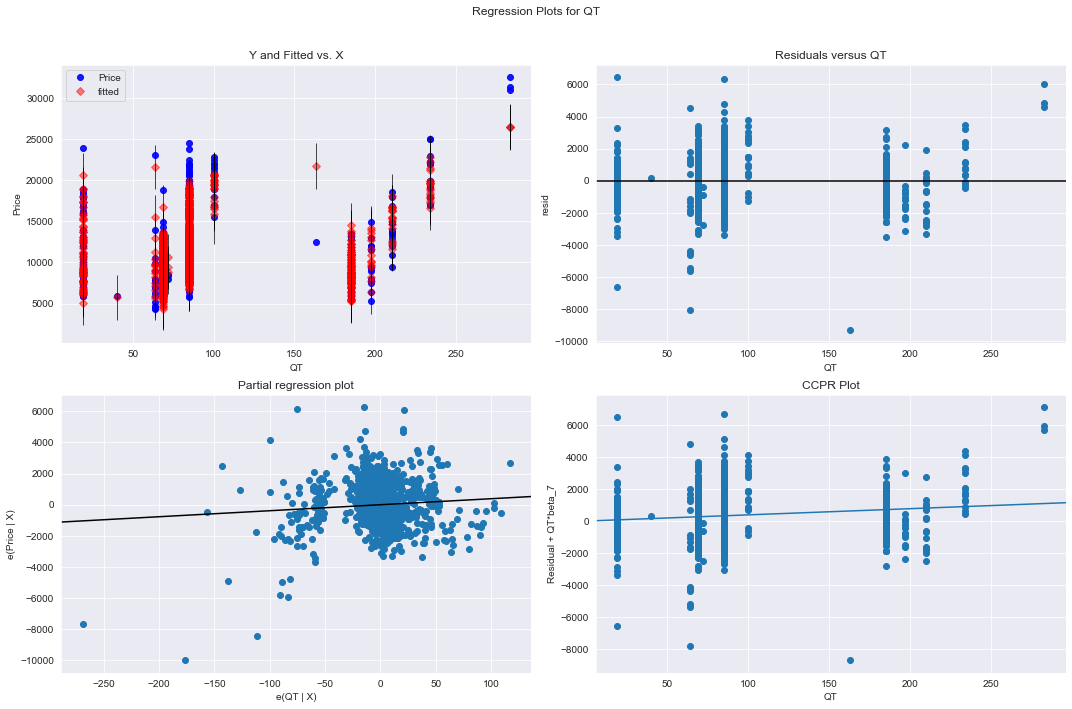

In [34]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'QT', fig = fig)
plt.show()

eval_env: 1


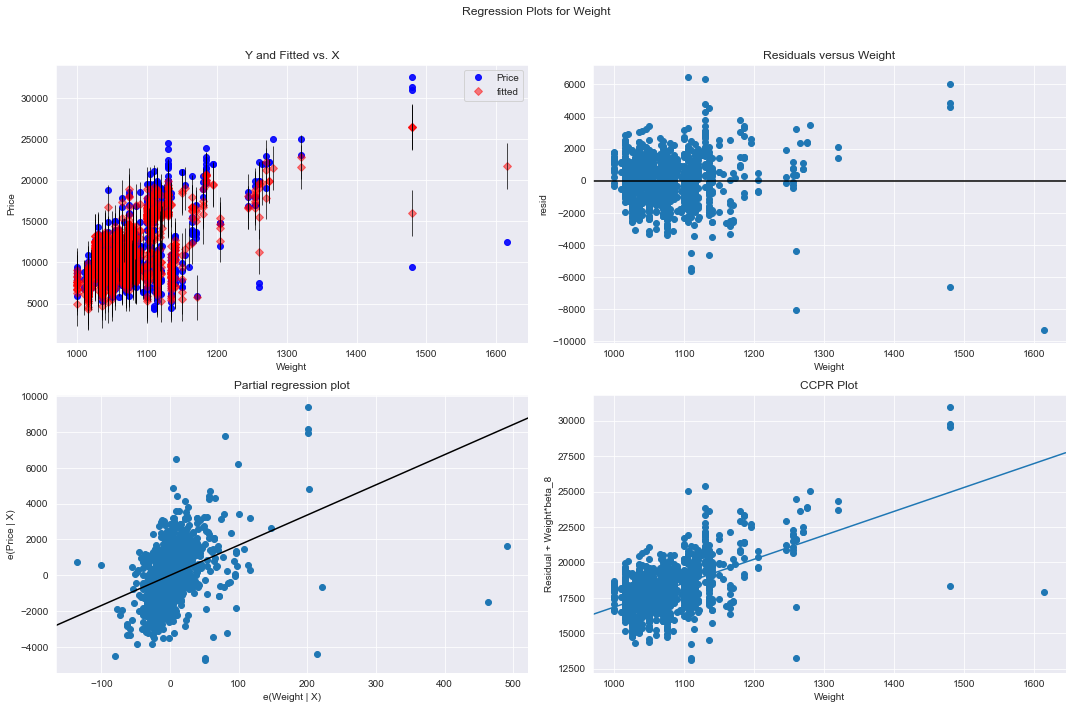

In [35]:
fig = plt.figure(figsize = (15, 10))
sm.graphics.plot_regress_exog(model, 'Weight', fig = fig)
plt.show()

# Model Deletion Diagnostics
## Checking Outliers or Influencers

## 1. Cook's Distance

In [36]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

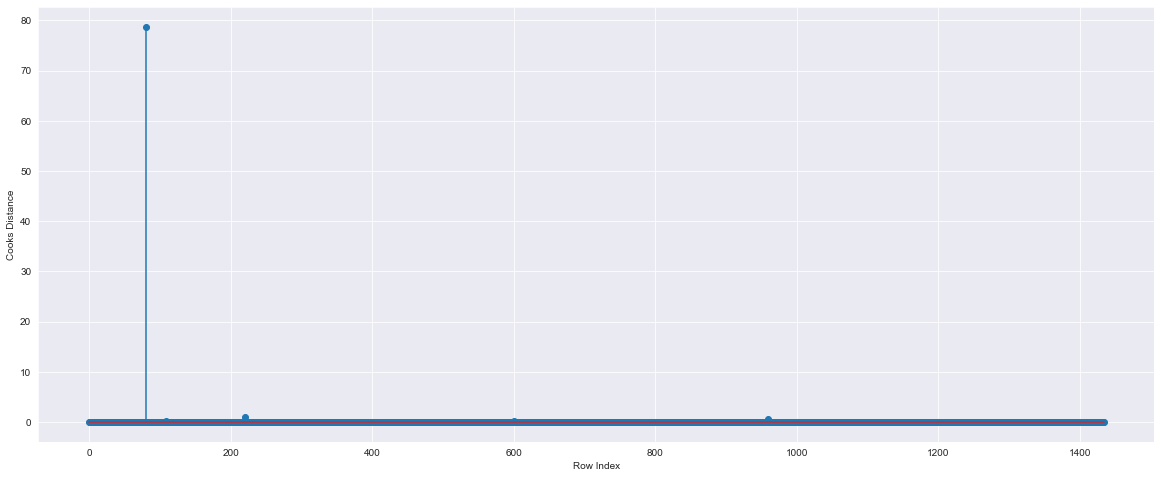

In [37]:
# Plot the influencers using the stem plot

fig = plt.figure(figsize = (20, 8))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [38]:
# Index and value of influencer where C > 0.5
np.argmax(c), np.max(c)

(80, 78.72950582248198)

## 2. Leverage Value

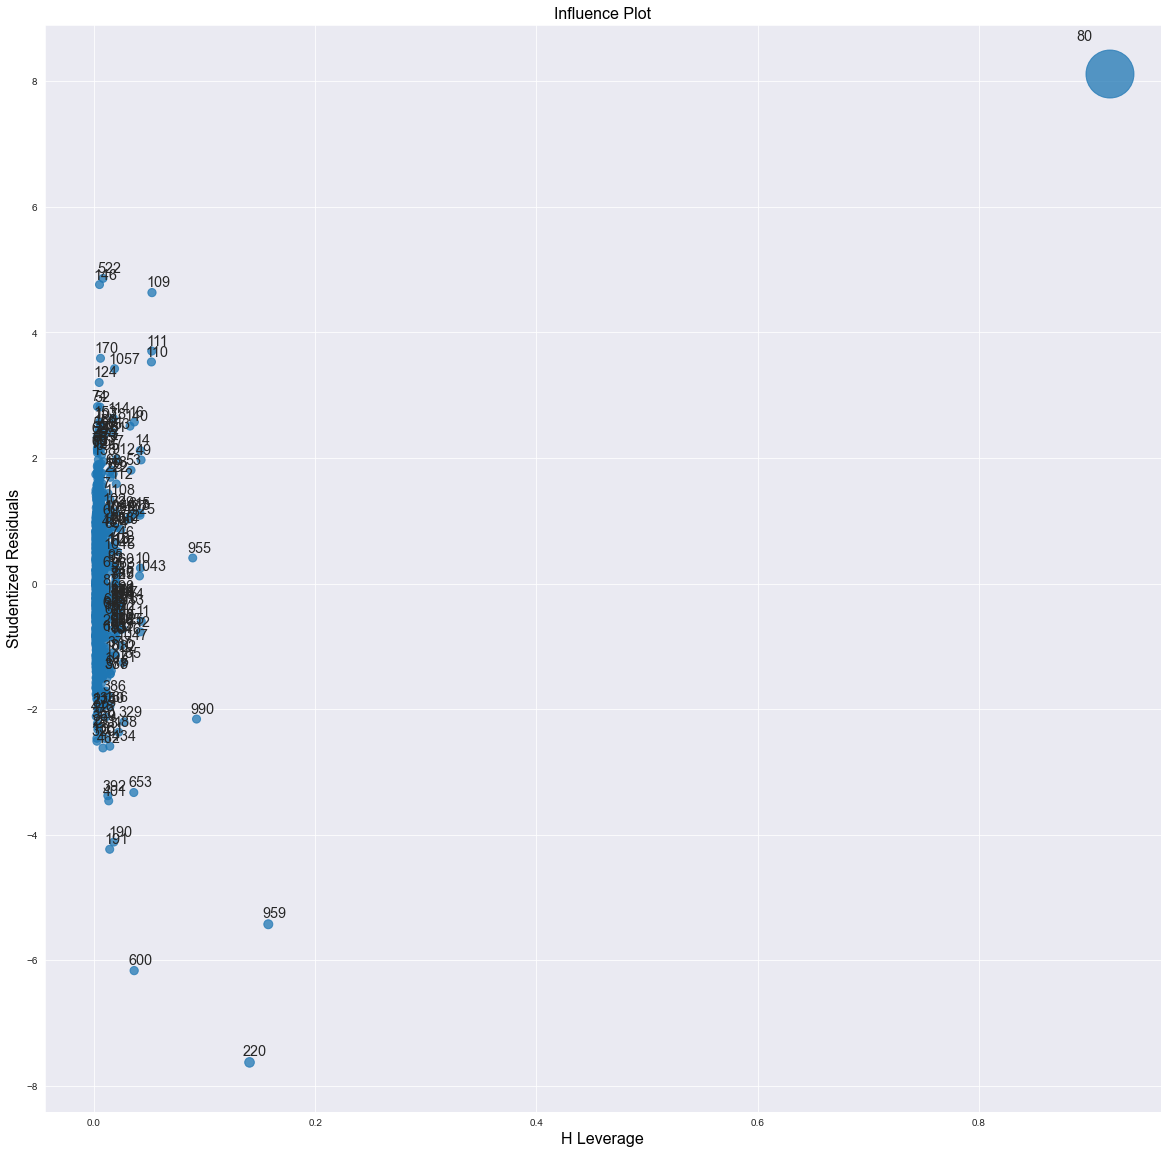

In [39]:
#Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
f, x = plt.subplots(figsize = (20, 20))
fig = influence_plot(model, ax = x)
plt.show()

In [40]:
# Leverage Cut-off Value = 3*(k+1)/n 
#k = no.of features/columns & n = no. of datapoints
k=data3.shape[1]
n=data3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [41]:
data3[data3.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [42]:
data3 = data3.drop(data3.index[[80]], axis = 0).reset_index(drop = True)
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


# Model Deletion Diagnostics and Final Model

In [43]:
while model.rsquared < 0.9:
    for c in [np.max(c) > 0.5]:
        model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = data3).fit()
        (c, _) = model.get_influence().cooks_distance
        c
        np.argmax(c), np.max(c)
        data3 = data3.drop(data3.index[[np.argmax(c)]], axis = 0).reset_index(drop=True)
        data3
    else:
        final_model = smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+Weight', data = data3).fit()
        final_model.rsquared, final_model.aic
        print('the model accuracy is improved to ', final_model.rsquared)

the model accuracy is improved to  0.8765926307402282
the model accuracy is improved to  0.8839684606741538
the model accuracy is improved to  0.8882395145171204
the model accuracy is improved to  0.8902571486612915
the model accuracy is improved to  0.8909888960319987
the model accuracy is improved to  0.8922595280462808
the model accuracy is improved to  0.8933621011392295
the model accuracy is improved to  0.8947147371605556
the model accuracy is improved to  0.8955233405057648
the model accuracy is improved to  0.8930210061069089
the model accuracy is improved to  0.8939546425147169
the model accuracy is improved to  0.8954112430715817
the model accuracy is improved to  0.8960182592139027
the model accuracy is improved to  0.8968403506948497
the model accuracy is improved to  0.8964026771830705
the model accuracy is improved to  0.8958538146890626
the model accuracy is improved to  0.8953750500147553
the model accuracy is improved to  0.8949455651565241
the model accuracy is improv

In [44]:
final_model.rsquared

0.9003762532318559

In [45]:
data3

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


# Model Predictions

In [46]:
# if new data predictions is
New_Data = pd.DataFrame({'Age': 19, 'KM': 31000, 'HP': 84, 'CC': 1500, 'Doors': 4, 'Gears': 5, 'QT': 210, 'Weight': 1170}, index = [0])
New_Data

,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,19,31000,84,1500,4,5,210,1170


In [47]:
# Manual Prediction of Price
final_model.predict(New_Data)

0    17561.078562
dtype: float64

In [48]:
#Automatic Prediction of Profit
pred_Y = final_model.predict(data3)
pred_Y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64

# R^2 value for each prepared model

In [49]:
d2 = {'Prepared_Models': ['Model', 'Final_model'], 'R-squared': [model.rsquared, final_model.rsquared]}
df = pd.DataFrame(d2)
df

,Prepared_Models,R-squared
0,Model,0.900224
1,Final_model,0.900376
